In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_train_path = "Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/test"
data_val_path = "Fruits_Vegetables/validation"

In [4]:
img_width = 180
img_height = 180

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)

Found 3115 files belonging to 36 classes.


In [6]:
data_cat = data_train.class_names

In [7]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                      image_size=(img_height,img_width),
                                                      batch_size=32,
                                                      shuffle=False,
                                                      validation_split=False)

Found 351 files belonging to 36 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False)


Found 359 files belonging to 36 classes.


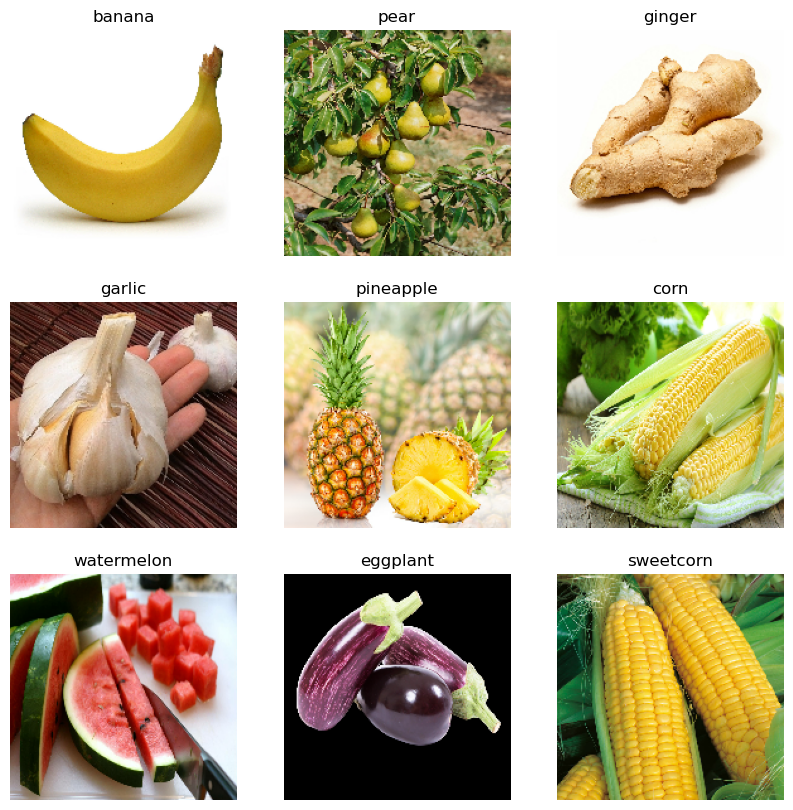

In [11]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [19]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 489ms/step - accuracy: 0.0866 - loss: 3.4798 - val_accuracy: 0.3447 - val_loss: 2.1342
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 448ms/step - accuracy: 0.3133 - loss: 2.3332 - val_accuracy: 0.6524 - val_loss: 1.3525
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 408ms/step - accuracy: 0.4964 - loss: 1.7684 - val_accuracy: 0.7721 - val_loss: 0.8054
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 498ms/step - accuracy: 0.6399 - loss: 1.2584 - val_accuracy: 0.8775 - val_loss: 0.5797
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 413ms/step - accuracy: 0.7818 - loss: 0.7818 - val_accuracy: 0.9117 - val_loss: 0.5605
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 395ms/step - accuracy: 0.8807 - loss: 0.4683 - val_accuracy: 0.9259 - val_loss: 0.4614
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 433ms/step - accuracy: 0.9312 - loss: 0.2994 - val_accuracy: 0.9459 - val_loss: 0.3334
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 413ms/step - accuracy: 0.9535 - loss: 0.1955 - val_accu

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figure=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

In [ ]:
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range,history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')


In [12]:
image = 'mango2.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [13]:
predict = model.predict(img_bat)

NameError: name 'model' is not defined

In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('Fruit name is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

In [ ]:
model.save('Image_classify.keras')